In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import random

from sklearn.linear_model import LinearRegression

In [32]:
# performs k-fold cross-validation of Ridge regression to find optimal value of alpha
# inputs: k - #folds, X, y - dataset, aplhas - list of alphas to choose from
# output: list of mse, for each of possible alphas
def ridge_cv(k, X, y, alphas):
    splits = k_split(k,len(X))
    results = []
    
    def calculate_mse(y_test, y_slice, alpha, bettas):
        n = len(y_test)
        m = len(y_slice)
        if n != m:
            raise Exception("Wrong dimensions")
        
        L2 = 0
        for _ in bettas:
            L2 += _**2
        
        square_error = mean_squared_error(y_test, y_slice)
        alpha_error = alpha * L2
        
        return square_error + alpha_error
    
    for alpha in alphas:
        MMSE = 0
        model = LinearRegression()
        for index in range(k):
            rows = splits[index]
            x_slice = X.iloc[rows]
            y_slice = y.iloc[rows]
            if index == k-1:
                y_predicted = model.predict(x_slice)
                # Evaluation data set
                MSE = calculate_mse(y_predicted, y_slice, alpha, model.coef_)
                MMSE += MSE
                continue
            model.fit(x_slice, y_slice)
        MMSE /= k
        results.append(MMSE)
    return results

# sub-procedure for ridge_cv
# returns k splits as tuples (train_indices, test_indices)
# inputs: k - #folds, l - #rows in the dataset (length)
# output: list of tuples
def k_split(k, l):
    if k > l:
        raise Exception("Wrong k-fold")
    indexes = np.arange(0, l)
    random.shuffle(indexes)
    
    
    splits = []
    for _ in range(k):
        splits.append([])

    index = 0
    amount = 0
    limit = l / k
    for _ in indexes:
        if amount >= limit:
            amount = 0
            index += 1
        splits[index].append(_)
        amount += 1
        
    
    return splits

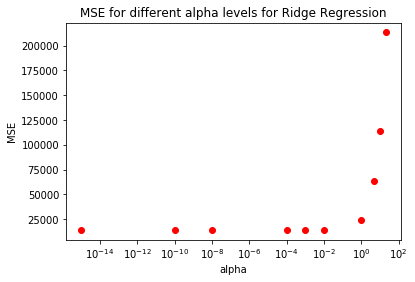

In [33]:
# load and pre-process the dataset
hitters = pd.read_csv("datasets/Hitters.csv").dropna().drop("Player", axis=1)
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])
# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
y = hitters.Salary

alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

results = ridge_cv(10, X, y, alphas)
# visualize the results
plt.plot(alphas, results, 'ro')
plt.title("MSE for different alpha levels for Ridge Regression")
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.show()

[[], [], []]


[[17, 5, 3, 6, 11, 13, 18], [1, 12, 8, 0, 7, 16, 19], [2, 14, 9, 4, 15, 10]]